# Regresión Logística

Al igual que LDA, supondremos que el logodds es lineal. Por lo tanto:

$$logodss=\frac {P(Y=1|X)}{1-P(Y=1|X)}=X^T.\vec w + b$$

Si despejamos $P(Y=1|X)$ nos queda: 

$$P(Y=1|X)=\frac{1}{1+e^{-(X^T.\vec w + b)}}$$

En el caso de LDA $\vec w$ y $b$ estaban vinculados.

Ahora vamos a plantear un criterio distinto:

<img src="Regre.jpg">

Cada vez que le damos a la entrada un conjunto de predictores a un regresor logístico, este nos devuelve un valor entre 0 y 1 que es la probabilidad de que pertenezca a la clase positiva.

Dicho de otra manera, para cada observación, el regresor logístico modela $P(y_i=1|X_i)$.
Además, contamos con las salidas deseadas $d_i$ también llamadas anotaciones o labels. Si la salida deseada $d_i=1$, nos gustaría que el regresor nos dé una salida lo mas cercana a 1 posible:

$$ P(y_i=1|X_i) -> 1 $$  

Si la salida deseada $d_i=0$ nos gustaría que:

$$ P(y_i=0|X_i) = 1-P(y_i=1|X_i) -> 1 $$

En el caso de que las observaciones sean independientes, una medida de cuan bien está ajustado nuestro modelo a todas las observaciones es multiplicar todas las estimaciones de probabilidad correspondientes a la salida deseada y tratar de que sea máxima. Es decir, si por ejemplo nuestras salidas deseadas son: 1,1,0,1,0. Nos gustaría que:

$$\mathcal{L}=P(y_1=1|X_1).P(y_2=1|X_2).P(y_3=0|X_3).P(y_4=1|X_4).P(y_5=0|X_5)$$

Sea lo mas grande posible, es decir, que esté lo mas cercano a uno posible. Escrito de otra forma:

$$\mathcal{L}=P(y_1=1|X_1).P(y_2=1|X_2).\left(1-P(y_=1|X_3)\right).P(y_4=1|X_4).\left(1-P(y_5=1|X_5)\right) -> 1$$

Escrito formalmente para un caso mas genérico, deseamos maximizar:

$$\mathcal{L}=\frac{1}{N}\prod_{i=1}^N[P(y_i=1|X_i)^{d_i}.(1-P(y_i=1|X_i)^{1-d_i})]$$

Siendo que maximizar una productoria es algo complejo, podemos maximizar su logaritmo. Esto es lo mismo ya que el logaritmo es monótono creciente.

$$\mathcal{\log L}=\frac{1}{N}\sum_{i=1}^N[\log P(y_i=1|X_i).d_i+\log(1-P(y_i=1|X_i)).(1-d_i)]$$

La derivada de esta expresión es conocida. En vez de maximizar el $\mathcal{\log L}$ podemos minimizar $\mathcal{-\log L}$. Nótese que esta última expresión es equivalente a la entropía cruzada entre las anotaciones correspondientes $d_i$ (determinística, vale 1 o 0) y la probabilidad estimada $P(Y_i=1|X_i=x_i)$. Es decir, la función de costo mide cuánto se parece la distribución de nuestro modelo con respecto a la real de los datos.  
Para el caso particular de modelar con una $P(y_i=1|X_i)$ con una función sigmoidea $\frac{1}{1+e^{-(X^T.\vec w + b)}}$, la cross-entropy (xent) nos queda:

$$xent=\frac{1}{N}\sum_{i=1}^N[\log \frac{1}{1+e^{-(X^T.\vec w + b)}}.d_i+\log (1-\frac{1}{1+e^{-(X^T.\vec w + b)}}).(1-d_i)]$$

O bien:

$$xent=\frac{1}{N}\sum_{i=1}^N[\log \frac{1}{1+e^{-(X^T.\vec w + b)}}.d_i + \log \frac{1}{1+e^{X^T.\vec w + b}}.(1-d_i)]$$

Se puede demostrar que la cross-entropy, para el caso de la regresión logística, en una función convexa y derivable. Ello la hace una función interesante ya que tiene solo un mínimo absoluto y no tiene mínimos locales.

<img src="sgd.gif">

Veamos un ejemplo de regresión logística con el tradicional problema de pesos y alturas.

$$
{\vec w}_{i+1} = {\vec w}_i - \eta \nabla E_\text{in}({\vec w}_i)
$$

De esta manera, iterativamente podemos encontrar el mínimo de la función de costo. Ampliaremos sobre el tema optimizadores mas adelante. 

https://blog.paperspace.com/intro-to-optimization-in-deep-learning-gradient-descent/

## Implementación de la regresión logística con sklearn

## Intro to optimization in deep learining: Gradient Descent

Por entrenar una red neuronal, nos referimos a minimizar la funcion de costo

### The Loss Function

<img src="images/convex_cost_function.png" />

Lost $\theta$ son los pesos y el z en la funcion de loss. queremos los $\theta$ donde z sea el minimo. Para llegar al minimo tenemos que usar gradient descent

### Gradient Descent

El gradiente el cual es la derivada de multiples dimensiones (?) nos indica en que direccion esta bajando. En realidad la direccion opuesta al gradiente es la que baja.

**learning rate** es el step que tomo en direccion opuesta al gradiente.

En la practica no necesariamente vamos a llegar al minimo real.

### Desafios del gradient descent

**#1: Local Minima**

<img src="images/challenges-1.png" />

Dependiendo de donde empieces puedo caer en un local minima. Y lo que necesitamos es un minimo global.

**#2: Saddle points(puntos monturas)**

Si se cae en uno de esos puede dar la ilusion de un minimo local

**Random**

SGD: Stochastic Gradient Descent

Calculamos el gradiente con una muestra aleatoria y no con todos los puntos. de la otra forma se llama Batch gradient Descent

Al final el minimo encotrado va a ser el mas minimo de todos los puntos calculados.

Para que la funcion de loss no tenga que calcular con todo se usa el mini-batch que calcula con 16,32 o 128 ejemplos




In [13]:
#import os
#os.environ["DISPLAY"]="localhost:10.0"
%reload_ext autoreload
%autoreload 2
#%matplotlib qt
import pandas as pd
import helper
from matplotlib import pyplot as plt

# Levanto el archivo de pesos y alturas
df = pd.read_csv('https://raw.githubusercontent.com/rn-2019-itba/Clase-4---LDA---QDA---RL---DT---RF/master/data/alturas-pesos-mils-train.csv')
df["Genero"] = (df["Genero"] != "Hombre").astype(int)

df.head() #Para visualizar las primeras 5 observaciones


,Unnamed: 0,Genero,Peso,Altura
0,7620,1,61.235,162.402
1,1837,0,97.432,181.908
2,3311,0,73.324,172.459
3,9478,1,55.193,157.748
4,7805,1,56.886,151.798


In [14]:
# Importo las libreria de sklearn
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

# Cargo los features y los labels
X = df[['Peso','Altura']].values
y = df['Genero'].values

# Separo los casos de entrenamiento con los casos de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Instancio el clasificador
clf = SGDClassifier(loss='log', penalty=None, max_iter=10)
# Entreno
clf.fit(X_train, y_train)

# Busco predecir los dos primeros
print(clf.predict(X_train[:2, :]))

# Imprimo el resultado de los dos primeros
print(y_train[:2])

print(clf.predict_proba(X_train[:2, :]))

# Imprimo los scores para entrenamiento y para test
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))
clf.coef_

[1 1]
[1 1]
[[0. 1.]
 [0. 1.]]
0.9203358208955223
0.9109848484848485


/Users/ivan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


array([[-7158.62110045,  3101.95437116]])

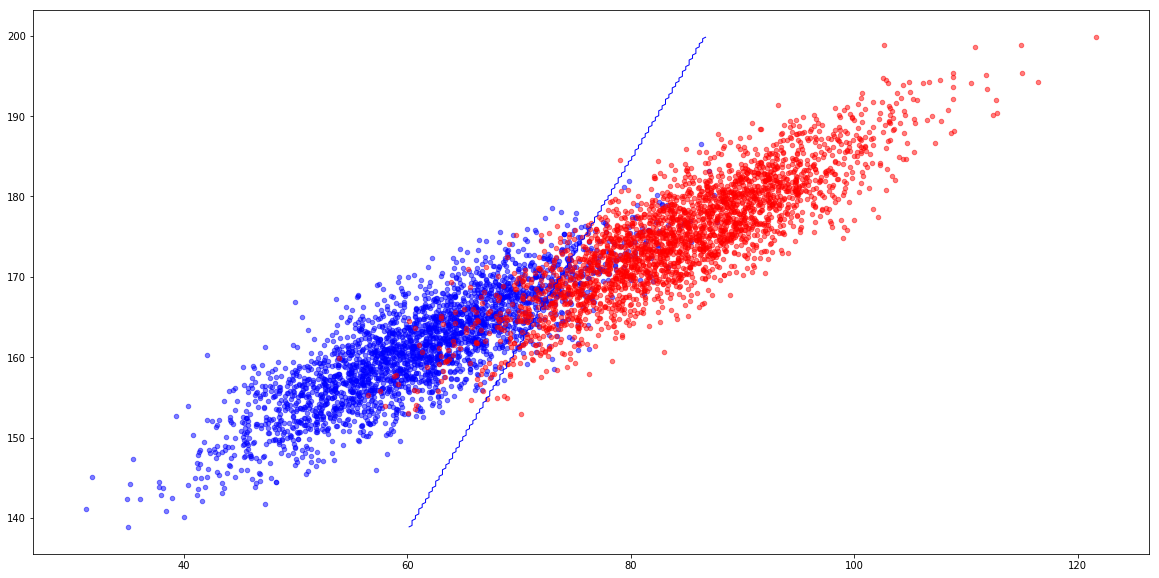

In [18]:
%matplotlib inline
helper.plotBoundary(X_train, y_train,  clf, 100)

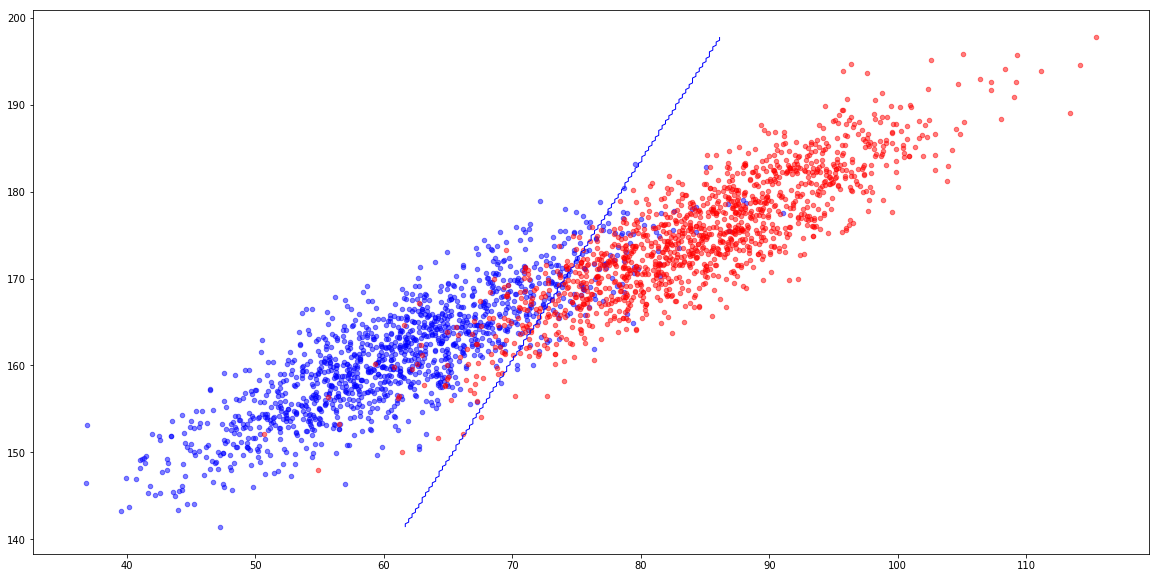

In [5]:
helper.plotBoundary(X_test, y_test,  clf, 50)

# Gráfica de la función de costo

In [19]:
import numpy as np

w1 = np.linspace(-0.1, 0.5, 100)
w2 = np.linspace(-0.3, 0.05, 100)

w1, w2 = np.meshgrid(w1,w2)
W = np.vstack([w1.flatten(), w2.flatten()])

aux1 = 1 / (1 + np.exp(-np.dot(X, W)))
aux2 = 1 / (1 + np.exp(np.dot(X, W)))

y_aux = np.repeat(y, aux1.shape[1]).reshape(aux1.shape)

loss = (y_aux * aux1 + (1 - y_aux) * aux2) / X.shape[0]
loss = loss.sum(axis = 0).reshape(w1.shape)

In [21]:
aux1

array([[1.51883293e-24, 2.20133379e-24, 3.19052237e-24, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.16974129e-28, 2.11124870e-28, 3.81056146e-28, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [2.21912377e-26, 3.46080180e-26, 5.39724250e-26, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       ...,
       [2.85226215e-26, 4.50618912e-26, 7.11917043e-26, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [3.24601252e-25, 4.82668868e-25, 7.17708988e-25, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.43679138e-26, 2.33781908e-26, 3.80389119e-26, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]])

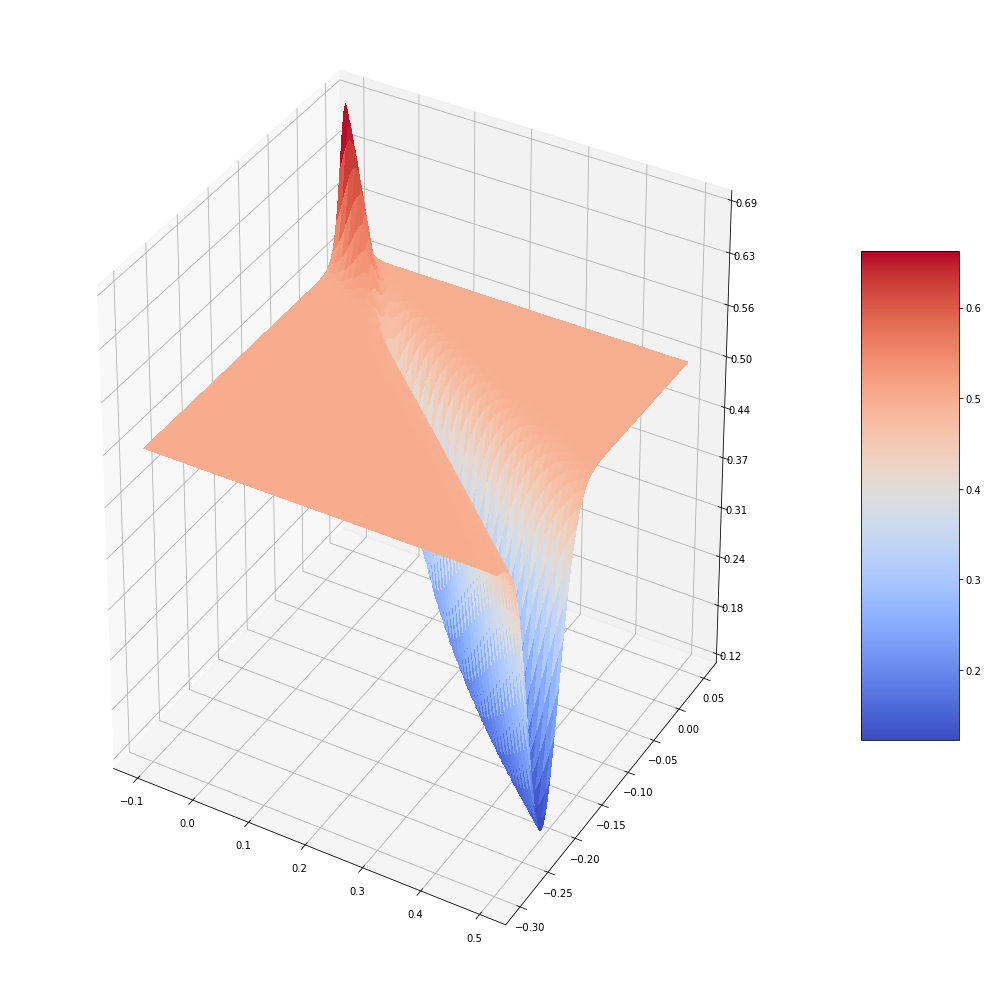

In [22]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure(figsize=[18,18])
ax = fig.gca(projection='3d')

# Plot the surface.
surf = ax.plot_surface(w1, w2, loss, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [9]:
w1.shape

(100, 100)

# Regresión logística en Keras

In [23]:
# Importo las librerias
import numpy as np
from keras.models import Sequential #Para poder definir un modelo secuencial
from keras.layers import Dense, BatchNormalization #Para poder usar capas densas
from keras.optimizers import SGD, Adam, rmsprop
import matplotlib.animation as animation

In [26]:
def show_learning(optimizer='Adam', batch_size=32, epochs=10, filename='movie.mp4'):
    """
    Uso keras para implements y entrenar SGD
    
    Args:
        optimizer (string): Tipo de optimizaor
        batch_size (int): El tamaño del batch que quiero usar
        epochs (int): La cantidad de epochs que quiero hacer
        filename (string): El nombre del archivo para guardar la animacion
    """
    # Instancio el modelo
    model=Sequential() #Queda definido el modelo sequencial
    #model.add(BatchNormalization())
    
    model.add(Dense(1, input_shape=(2,), activation='sigmoid', use_bias=False, kernel_initializer='zeros', bias_initializer='zeros'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    learning_curve = helper.plot_learning_curve(plot_interval=1, 
                                              evaluate_interval=None, 
                                              x_val=None, 
                                              y_val_categorical=None,
                                              epochs=epochs)

    def get_weights(model):
        w1 = model.layers[0].get_weights()[0][0][0]
        w2 = model.layers[0].get_weights()[0][1][0]
        return [w1, w2]
    
    def set_weights(model, w1, w2):
        weights = model.layers[0].get_weights()
        weights[0][0][0] = w1
        weights[0][1][0] = w2
        model.layers[0].set_weights(weights)
        
    log_weights = helper.log_weights(get_weights)
    set_weights(model=model, w1=0.1, w2=-0.14)
    X_loss = X_train[0:100,:]
    y_loss = y_train[0:100]
    
    %matplotlib inline
    history = model.fit(X_train, y_train, validation_data=[X_test,y_test],
                  epochs=epochs, verbose=0, batch_size=batch_size,shuffle = True,
                  callbacks = [learning_curve, log_weights])
    loss=list()
    
    %matplotlib qt
    w1_mesh, w2_mesh, J = helper.plot_loss_surface(X_loss, y_loss, model, set_weights, [-1,0.5], [-0.2,0.5], 20, plot=True)
    
    for w in log_weights.weights:
        loss.append(helper.get_loss(w[0], w[1], model, X=X_loss, y=y_loss, set_weights=set_weights))
    
    data = np.hstack([np.array(log_weights.weights),np.array(loss).T.reshape(-1,1)]).T
    fig, ax = plt.subplots()
    CS = ax.contourf(w1_mesh, w2_mesh, J, 100, cmap=plt.cm.coolwarm)
    line, = ax.plot([], [],'k')
    
    def animate(i):
        line.set_data(data[0,:i],data[1,:i])  # update the data
        
        if i % int(len(loss) / 100) == 0:
            porc = int(i/len(loss)*100)
            print("\r {}%".format(porc),end="")
        return line,

    ani = animation.FuncAnimation(fig, animate, len(loss),
                              interval=25, blit=False)
    ani.save(filename)
    plt.show()
    
    

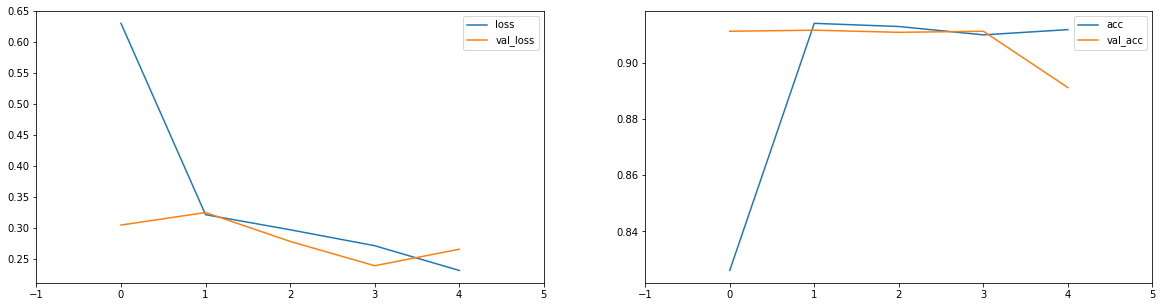

MovieWriter ffmpeg unavailable. Trying to use pillow instead.


 99%

ValueError: unknown file extension: .mp4

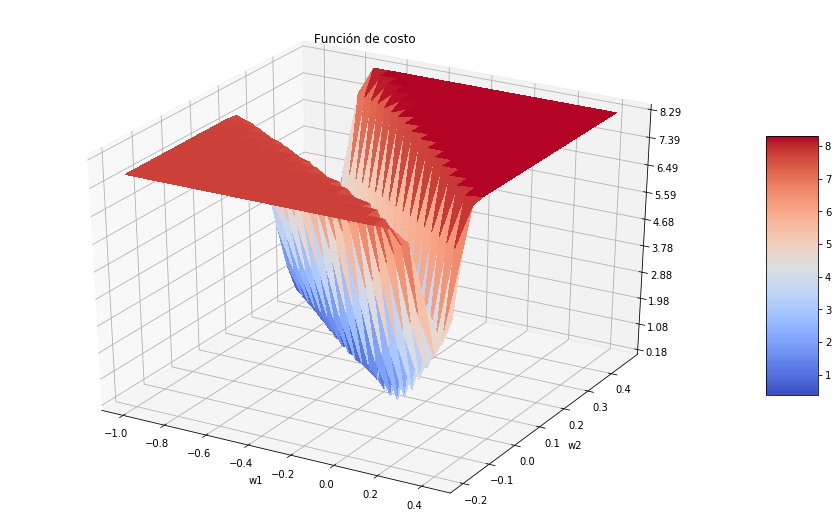

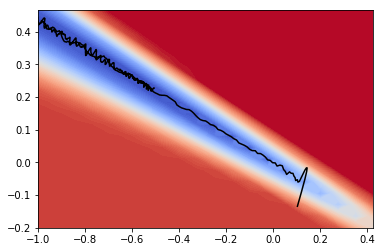

In [25]:
lr=1e-4
momentum=0.99
nesterov=0.99
decay=0
batch_size=32
epochs=5
optimizer=SGD(lr=lr,momentum=momentum, nesterov=nesterov,decay=decay)
show_learning(optimizer=optimizer, 
              batch_size=batch_size,
              epochs=epochs,
              filename='sgd-{}-{}-{}-{}-{}-{}.mp4'.format(lr,momentum,nesterov,decay,batch_size,epochs))

In [ ]:
%matplotlib inline
fig1, ax2 = plt.subplots(constrained_layout=True)
CS = ax2.contourf(w1_mesh, w2_mesh, J, 100, cmap=plt.cm.coolwarm)
ax2.plot(np.array(log_weights.weights).T[0],np.array(log_weights.weights).T[1],'k')
plt.show()

* Normalización
* Batch Normalization
* Inicialización de Kernel y bias